#Traffic Collisions#
Because "accident" implies there's nobody to blame.
---
I wanted to recreate the popular "bar chart race" visualization in python. I found a great resource for building one using matplotlib, so this is my attempt at recreating that. Here we go!

I found a dataset on traffic accidents. I may want to do a count of traffic accidents per city (maybe for something more advanced, calculate traffic accidents over the population, not just total count). 


Trying something new: using the Kaggle API to get the dataset in colab rather than downloading and importing. Seems much better now that I've finally go it working. 

Had to give it a few tries with different tutorials, there was difficulty in storing kaggle as a hidden directory and then going from there. Also some API keys seemed to be expired and that threw me off as well. But it's up and running now! 

Thank you to...

https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463
https://medium.com/@yvettewu.dw/tutorial-kaggle-api-google-colaboratory-1a054a382de0
https://stackoverflow.com/questions/40900195/pandas-cumulative-count
https://stackoverflow.com/questions/50863691/pandas-convert-date-object-to-int
https://scentellegher.github.io/programming/2017/07/15/pandas-groupby-multiple-columns-plot.html



In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle

In [2]:
#Get the json file for the API key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ewarmstrong0710","key":"a1c1b810c9e3793926fa1414e02e2cdc"}'}

In [0]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d sobhanmoosavi/us-accidents --force

 96% 190M/199M [00:01<00:00, 91.3MB/s]
100% 199M/199M [00:02<00:00, 91.8MB/s]


In [5]:
!unzip \*.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec19.csv  


In [0]:
import pandas as pd
from datetime import datetime
df = pd.read_csv('US_Accidents_Dec19.csv')
df = df[['City', 'State', 'Start_Time']]

In [30]:
#Date
#Change Start_Time to a datetime object
#Then change the date time (date) to a string and cut out the "-"
#Next time I'll just take the first few characters
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Date'] = df['Start_Time'].dt.date.astype(str)
#df['Date'] = df['Date'].str.replace("-","").astype(int)

#Location
#Combine city and state, account for common city names- like Springfield or Shelbyville. Drop originals 
df['Location'] = df['City'] + ", " + df['State']
df = df.drop(['City', 'State', 'Start_Time'], axis = 1) 

#drop rows with missing values
df = df.dropna()

#This creates a column to keep a running count of collisions for each location
df['CumCollisionCount'] = df.groupby('Location').cumcount() + 1

df

,Date,Location,CumCollisionCount
0,2016-02-08,"Dayton, OH",1
1,2016-02-08,"Reynoldsburg, OH",1
2,2016-02-08,"Williamsburg, OH",1
3,2016-02-08,"Dayton, OH",2
4,2016-02-08,"Dayton, OH",3
...,...,...,...
2974330,2019-08-23,"Riverside, CA",10249
2974331,2019-08-23,"San Diego, CA",21045
2974332,2019-08-23,"Orange, CA",3397
2974333,2019-08-23,"Culver City, CA",2436


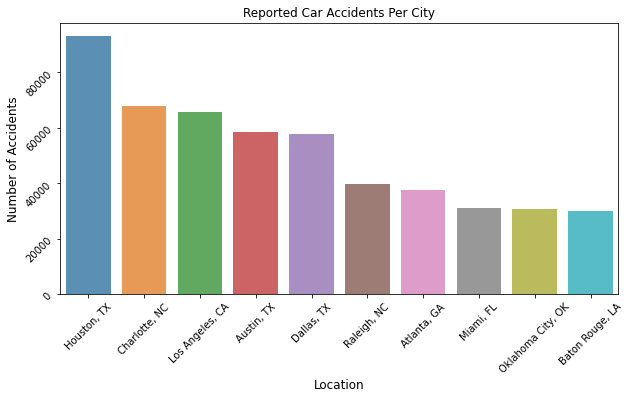

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

city_count  = df['Location'].value_counts()
city_count = city_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(city_count.index, city_count.values, alpha=0.8, )
plt.title('Reported Car Accidents Per City')
plt.ylabel('Number of Accidents', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.tick_params(rotation=45)
plt.show()

#Is there a way to plot for a range of dates? 

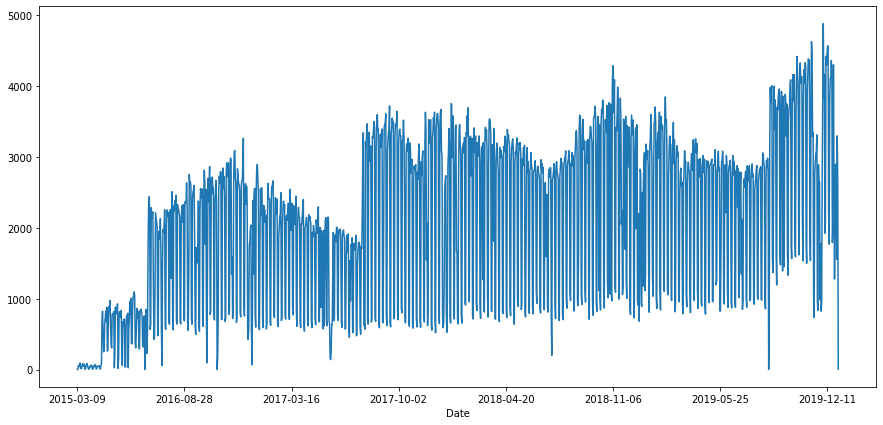

In [32]:
%matplotlib inline
#Let's keep this one- turned out to be a great visualization of accidents over time
#I didn't realize matplotlib could take datetimes as an axis easily, now I know
#plot data
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Date']).count()['CumCollisionCount'].plot(ax=ax)

In [53]:
current_date = '2018-05-20'
df = (df[df['Date'].le(current_date)].sort_values(by='CumCollisionCount', ascending=False))
df

#grouped.sort_values('Location', ascending=False)


#How to return only the top 10 unique Locations for each Date? 

,Date,Location,CumCollisionCount
2247062,2016-03-10,"Indianapolis, IN",15593
2247061,2016-03-10,"Indianapolis, IN",15592
2247060,2016-03-10,"Indianapolis, IN",15591
2247059,2016-03-10,"Indianapolis, IN",15590
2246436,2016-02-15,"Indianapolis, IN",15589
...,...,...,...
2246750,2016-02-25,"Warsaw, IN",1
177,2016-02-16,"Strongsville, OH",1
238,2016-02-18,"Mount Sterling, OH",1
526,2016-03-08,"Amelia, OH",1


In [41]:
grouped = df.groupby('Date').sum().reset_index() \
            #.groupby('Location').sum()

df
#grouped.sort_values('Date', ascending=False)

,Date,Location,CumCollisionCount
0,2016-02-08,"Dayton, OH",1
1,2016-02-08,"Reynoldsburg, OH",1
2,2016-02-08,"Williamsburg, OH",1
3,2016-02-08,"Dayton, OH",2
4,2016-02-08,"Dayton, OH",3
...,...,...,...
2974330,2019-08-23,"Riverside, CA",10249
2974331,2019-08-23,"San Diego, CA",21045
2974332,2019-08-23,"Orange, CA",3397
2974333,2019-08-23,"Culver City, CA",2436


In [26]:
df.head(20)

,Date,Location,CumCollisionCount
2247062,2016-03-10,"Indianapolis, IN",15593
2247061,2016-03-10,"Indianapolis, IN",15592
2247060,2016-03-10,"Indianapolis, IN",15591
2247059,2016-03-10,"Indianapolis, IN",15590
2246436,2016-02-15,"Indianapolis, IN",15589
...,...,...,...
326,2016-02-22,"Vermilion, OH",1
315,2016-02-22,"Maineville, OH",1
284,2016-02-19,"Bowling Green, OH",1
281,2016-02-19,"Hilliard, OH",1


In [0]:
import numpy as np
ddf = df['Location'].unique()
ddf

Here's where I'm giong to need to take a break. I still want to make the 'barplot race' over the timespan of the dataset, but will need to adjust my method...


For any given day (or range of days), I want to return the cities with the highest counts of accidents -- even if they did not have an accident on that particular day....

"For this day and any day before it, return the top 10 unique cities with highest crash counts"

I'm hoping to do this in matplotlib so I can animate the race like so:

https://towardsdatascience.com/bar-chart-race-in-python-with-matplotlib-8e687a5c8a41